# Integracia dat

<!--
navody na pouzivanie pandas, matplotlib a numpy na spracovanie dat. Niesu to informacie o tom ako robit explorativnu analyzu, ale ako pouzivat kniznice

Z tohoto povyberam zaujimave casti, spojim ich s nejakou kapitolou v knihe o tom ako riesit spracovanie, cistanie dat a transformovanie dat
http://nbviewer.jupyter.org/github/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_10_pandas_introduction.ipynb
http://nbviewer.jupyter.org/github/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_11_pandas_adding_data.ipynb
http://nbviewer.jupyter.org/github/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_12_pandas_groupby.ipynb
http://nbviewer.jupyter.org/github/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_13_pandas_movies.ipynb 
http://nbviewer.jupyter.org/github/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_14_pandas_reshape.ipynb
http://nbviewer.jupyter.org/github/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_15_pandas_transforming.ipynb
http://nbviewer.jupyter.org/github/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_21_pandas_processing.ipynb
http://nbviewer.jupyter.org/github/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_22_pandas_cleaning.ipynb

http://nbviewer.jupyter.org/github/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_23_titanic_example.ipynb
-->

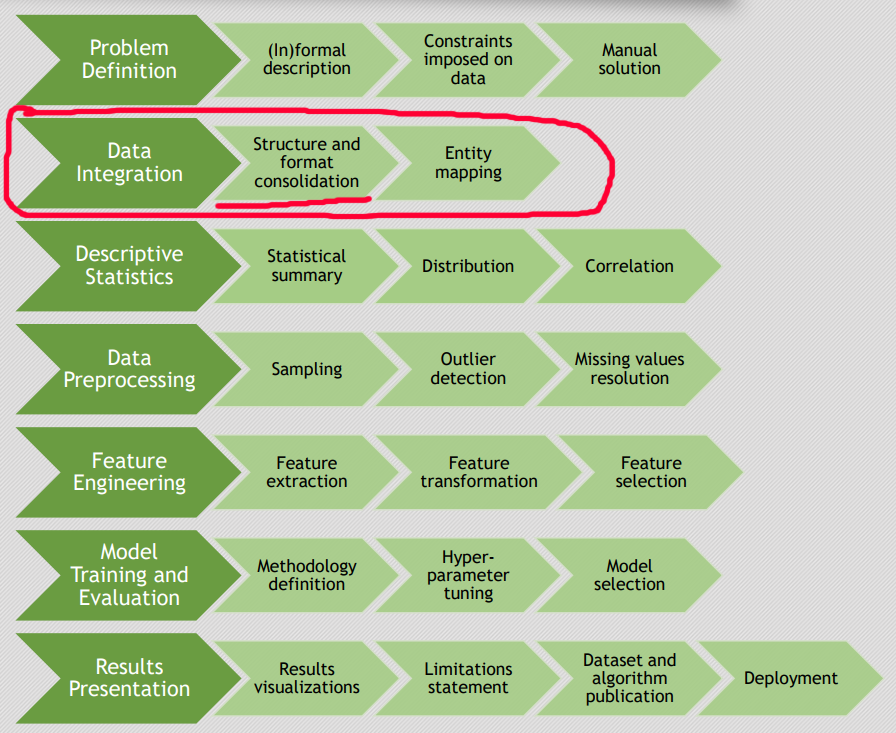

In [1]:
from IPython.display import Image
Image('ML_Workflow.PNG')

# O com nejdem hovorit

* Nejdem opisovat vsetky mozne record linkage a entity mapping metody (to je minimalne na samostatnu prednasku)
* Nejdem opisovat komplexne ETL nastroje a postupy na spajanie tabuliek a roznych databaz (na to tu mame dokonca samostatny predmet)

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Skusme sa pohrat s nejakymi datami

In [3]:
data = pd.read_csv("data/BETR8010000800100hour.1-1-1990.31-12-2012")
data.head()

1990-01-01\t-999.000\t0\t-999.000\t0\t-999.000\t0\t-999.000\t0\t-999.000\t0\t-999.000\t0\t-999.000\t0\t-999.000\t0\t-999.000\t0\t-999.000\t0\t-999.000\t0\t-999.000\t0\t-999.000\t0\t-999.000\t0\t-999.000\t0\t-999.000\t0\t-999.000\t0\t-999.000\t0\t-999.000\t0\t-999.000\t0\t-999.000\t0\t-999.000\t0\t-999.000\t0\t-999.000\t0
0  1990-01-02\t-999.000\t0\t-999.000\t0\t-999.000...                                                                                                                                                                                                                                                                                
1  1990-01-03\t51.000\t1\t50.000\t1\t47.000\t1\t4...                                                                                                                                                                                                                                                                                
2  1990-01-04\t-999.000\t0\t-999.000\t0\t-999.000...                                                                                                                                                                                                                                                                                
3  1990-01-05\t51.000\t1\t51.000\t1\t48.000\t1\t5...                                                                                                                                                                                                                                                                                
4  1990-01-06\t-999.000\t0\t-999.000\t0\t-999.000...

Vidime, ze pri nacitani nastalo viacero problemov - vsetky data skoncili v jednom stlpci a navyse prvy riadok bol automaticky interpretovany ako hlavicka. Skusme sa teda pozriet na data v nejakom editore (postaci aj konzola) predtym, ako ich nacitame:

In [4]:
%%bash
head data/BETR8010000800100hour.1-1-1990.31-12-2012

Couldn't find program: 'bash'


z tohoto zatial vieme asi len to, ze pojde o csv format, separator hodnot je \t, su tam same numericke data a nemame pomenovane atributy

In [5]:
data = pd.read_csv("data/BETR8010000800100hour.1-1-1990.31-12-2012", sep='\t')
data.head()
# Data su tvorene meraniami nejakej veliciny v jednotlivych hodinach dna. 
# Co den, to riadok. Kazda hodina ma zvlast stlpec + je tu stlpec pre nejaky flag, ktory nas nezaujima
# su tam nejak divne hodnoty, ktore by tam asi nemali byt -999 a -9999
# datum bude asi index
# v subore nieje hlavicka

1990-01-01  -999.000  0  -999.000.1  0.1  -999.000.2  0.2  -999.000.3  0.3  \
0  1990-01-02    -999.0  0      -999.0    0      -999.0    0      -999.0    0   
1  1990-01-03      51.0  1        50.0    1        47.0    1        48.0    1   
2  1990-01-04    -999.0  0      -999.0    0      -999.0    0      -999.0    0   
3  1990-01-05      51.0  1        51.0    1        48.0    1        50.0    1   
4  1990-01-06    -999.0  0      -999.0    0      -999.0    0      -999.0    0   

   -999.000.4  ...   -999.000.19  0.19  -999.000.20  0.20  -999.000.21  0.21  \
0      -999.0  ...          57.0     1         58.0     1         54.0     1   
1        51.0  ...          84.0     1         75.0     1       -999.0     0   
2      -999.0  ...          69.0     1         65.0     1         64.0     1   
3        51.0  ...        -999.0     0       -999.0     0       -999.0     0   
4      -999.0  ...        -999.0     0       -999.0     0       -999.0     0   

   -999.000.22  0.22  -999.000.23  0.23  
0         49.0     1         48.0     1  
1       -999.0     0       -999.0     0  
2         60.0     1         59.0     1  
3       -999.0     0       -999.0     0  
4       -999.0     0       -999.0     0  

[5 rows x 49 columns]

In [6]:
filename = "data/BETR8010000800100hour.1-1-1990.31-12-2012"

data = pd.read_csv(filename, sep='\t', header=None,
                   na_values=[-999, -9999], index_col=0)
# vela upratovania dat vieme spravit uz pri nacitani
data.head()

1   2     3   4     5   6     7   8     9   10 ...    39  40  \
0                                                            ...             
1990-01-01   NaN   0   NaN   0   NaN   0   NaN   0   NaN   0 ...   NaN   0   
1990-01-02   NaN   0   NaN   0   NaN   0   NaN   0   NaN   0 ...  57.0   1   
1990-01-03  51.0   1  50.0   1  47.0   1  48.0   1  51.0   1 ...  84.0   1   
1990-01-04   NaN   0   NaN   0   NaN   0   NaN   0   NaN   0 ...  69.0   1   
1990-01-05  51.0   1  51.0   1  48.0   1  50.0   1  51.0   1 ...   NaN   0   

              41  42    43  44    45  46    47  48  
0                                                   
1990-01-01   NaN   0   NaN   0   NaN   0   NaN   0  
1990-01-02  58.0   1  54.0   1  49.0   1  48.0   1  
1990-01-03  75.0   1   NaN   0   NaN   0   NaN   0  
1990-01-04  65.0   1  64.0   1  60.0   1  59.0   1  
1990-01-05   NaN   0   NaN   0   NaN   0   NaN   0  

[5 rows x 48 columns]

In [7]:
# skusime povyhadzovat tie flagy, ktore nas nezaujimaju. Zhodou okolnosti je to kazdy druhy stlpec
data.columns[1::2]

Int64Index([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
            36, 38, 40, 42, 44, 46, 48],
           dtype='int64')

In [8]:
data = data.drop(data.columns[1::2], axis=1)
data.head()

1     3     5     7     9     11    13    15    17    19  ...   \
0                                                                       ...    
1990-01-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    
1990-01-02   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  48.0  ...    
1990-01-03  51.0  50.0  47.0  48.0  51.0  52.0  58.0  57.0   NaN   NaN  ...    
1990-01-04   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    
1990-01-05  51.0  51.0  48.0  50.0  51.0  58.0  65.0  66.0  69.0  74.0  ...    

              29    31    33    35     37    39    41    43    45    47  
0                                                                        
1990-01-01   NaN   NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN   NaN  
1990-01-02  55.0  59.0  58.0  59.0   58.0  57.0  58.0  54.0  49.0  48.0  
1990-01-03  69.0  74.0   NaN   NaN  103.0  84.0  75.0   NaN   NaN   NaN  
1990-01-04   NaN  71.0  74.0  70.0   70.0  69.0  65.0  64.0  60.0  59.0  
1990-01-05   NaN   NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN   NaN  

[5 rows x 24 columns]

In [9]:
# Skusme si nejak normalne pomenovat vzniknute stlpce
["{:02d}".format(i) for i in range(len(data.columns))]

['00',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23']

In [10]:
# mam nejako rozsypane nazvy stlpcov
data.columns = ["{:02d}".format(i) for i in range(len(data.columns))]
data.head()

00    01    02    03    04    05    06    07    08    09  ...   \
0                                                                       ...    
1990-01-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    
1990-01-02   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  48.0  ...    
1990-01-03  51.0  50.0  47.0  48.0  51.0  52.0  58.0  57.0   NaN   NaN  ...    
1990-01-04   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    
1990-01-05  51.0  51.0  48.0  50.0  51.0  58.0  65.0  66.0  69.0  74.0  ...    

              14    15    16    17     18    19    20    21    22    23  
0                                                                        
1990-01-01   NaN   NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN   NaN  
1990-01-02  55.0  59.0  58.0  59.0   58.0  57.0  58.0  54.0  49.0  48.0  
1990-01-03  69.0  74.0   NaN   NaN  103.0  84.0  75.0   NaN   NaN   NaN  
1990-01-04   NaN  71.0  74.0  70.0   70.0  69.0  65.0  64.0  60.0  59.0  
1990-01-05   NaN   NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN   NaN  

[5 rows x 24 columns]

In [11]:
data = data.stack()
data.head()

1990-01-02  09    48.0
            12    48.0
            13    50.0
            14    55.0
            15    59.0
dtype: float64

In [12]:
type(data) # vysledok preusporiadania je viacdimenzionalny Series objekt, a nie DataFrame. Ja chcem mat pekny data frame, tak s tim nieco spravime

pandas.core.series.Series

In [13]:
# mohli by sme nejak normalne pomenovat stlpec
# napriklad nazvom stanice
import os
_, fname = os.path.split(filename)
station = fname[:7]
print(filename)
print(station)

data/BETR8010000800100hour.1-1-1990.31-12-2012
BETR801


In [14]:
data = data.reset_index(name=station) #reset index mi z toho spravi data frame
# data = data.reset_index() #reset index mi z toho spravi data frame
print(type(data))
data.head()

<class 'pandas.core.frame.DataFrame'>


0 level_1  BETR801
0  1990-01-02      09     48.0
1  1990-01-02      12     48.0
2  1990-01-02      13     50.0
3  1990-01-02      14     55.0
4  1990-01-02      15     59.0

In [15]:
data = data.rename(columns = {0:'date', 'level_1':'hour'})
data.head()

date hour  BETR801
0  1990-01-02   09     48.0
1  1990-01-02   12     48.0
2  1990-01-02   13     50.0
3  1990-01-02   14     55.0
4  1990-01-02   15     59.0

In [16]:
# teraz tomu vyrobime novy index z datumu a hodiny
data.index = pd.to_datetime(data['date'] + ' ' + data['hour'])
data.head()

date hour  BETR801
1990-01-02 09:00:00  1990-01-02   09     48.0
1990-01-02 12:00:00  1990-01-02   12     48.0
1990-01-02 13:00:00  1990-01-02   13     50.0
1990-01-02 14:00:00  1990-01-02   14     55.0
1990-01-02 15:00:00  1990-01-02   15     59.0

In [17]:
# a zmazeme nepotrebne stlpce
data = data.drop(['date', 'hour'], axis=1)
data.head()
# Teraz uz mame data, s ktorymi sa uz da nieco robit

BETR801
1990-01-02 09:00:00     48.0
1990-01-02 12:00:00     48.0
1990-01-02 13:00:00     50.0
1990-01-02 14:00:00     55.0
1990-01-02 15:00:00     59.0

Ja mam tych suborov viac. Kazdy obsahuje data z inej meracej stanice. Aby som zjednodusil prezentaciu, tak predchadzajuci kod som dal do cyklu a vlozil do skriptu

In [18]:
import airbase
no2 = airbase.load_data()

C:\Users\GLaDOS\Anaconda3\lib\site-packages\pandas\io\parsers.py:709: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


In [19]:
no2.head(3)

BETR801  BETN029  FR04037  FR04012
1990-01-01 00:00:00      NaN     16.0      NaN      NaN
1990-01-01 01:00:00      NaN     18.0      NaN      NaN
1990-01-01 02:00:00      NaN     21.0      NaN      NaN

In [20]:
no2.tail()

BETR801  BETN029  FR04037  FR04012
2012-12-31 19:00:00     21.0      2.5     28.0     67.0
2012-12-31 20:00:00     16.5      2.0     16.0     47.0
2012-12-31 21:00:00     14.5      2.5     13.0     43.0
2012-12-31 22:00:00     16.5      3.5     14.0     42.0
2012-12-31 23:00:00     15.0      3.0     13.0     49.0

In [21]:
no2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 198895 entries, 1990-01-01 00:00:00 to 2012-12-31 23:00:00
Data columns (total 4 columns):
BETR801    170794 non-null float64
BETN029    174807 non-null float64
FR04037    120384 non-null float64
FR04012    119448 non-null float64
dtypes: float64(4)
memory usage: 7.6 MB


In [22]:
no2.describe()

BETR801        BETN029        FR04037        FR04012
count  170794.000000  174807.000000  120384.000000  119448.000000
mean       47.914561      16.687756      40.040005      87.993261
std        22.230921      13.106549      23.024347      41.317684
min         0.000000       0.000000       0.000000       0.000000
25%        32.000000       7.000000      23.000000      61.000000
50%        46.000000      12.000000      37.000000      88.000000
75%        61.000000      23.000000      54.000000     115.000000
max       339.000000     115.000000     256.000000     358.000000

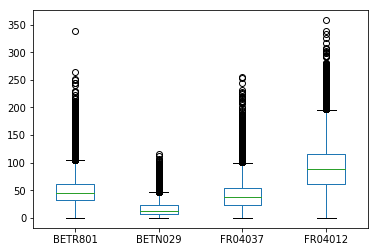

In [23]:
no2.plot(kind='box')

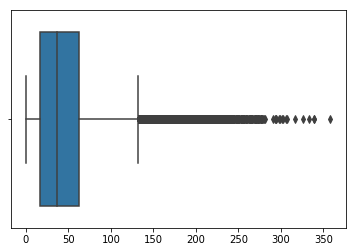

In [24]:
# boxplot vie ukazat aj outlierov
sns.boxplot(no2, sym='k.')

tych outlierov by som mal normalne vidiet aj v tom klasickom boxplote, ale je nejaky bug vo verzii matplotlibu, ktoru mam nainstalovanu a zle interaguje s importovanou kniznicou seaborn. Preto som ich radsej ukazal v kniznici seaborn. Ak by som ju ale vobec nenaimportoval, tak by tam tie outliery mali byt. 
Vraj je to uz v najnovsej verzii matplotlibu opravene :(

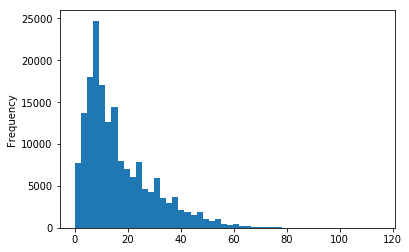

In [25]:
no2['BETN029'].plot(kind='hist', bins=50)

In [26]:
import seaborn

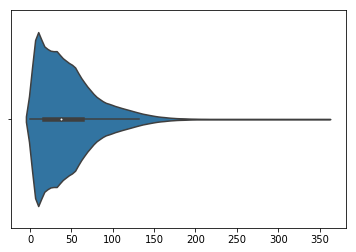

In [27]:
seaborn.violinplot(no2)

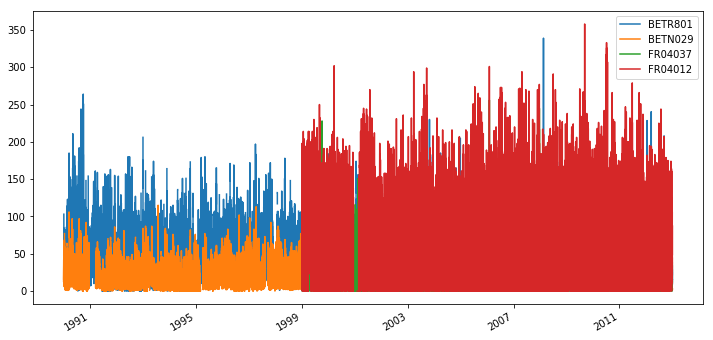

In [28]:
no2.plot(figsize=(12,6))
# mozem si vyplotovat surove data, ale je otazne, co mi to povie

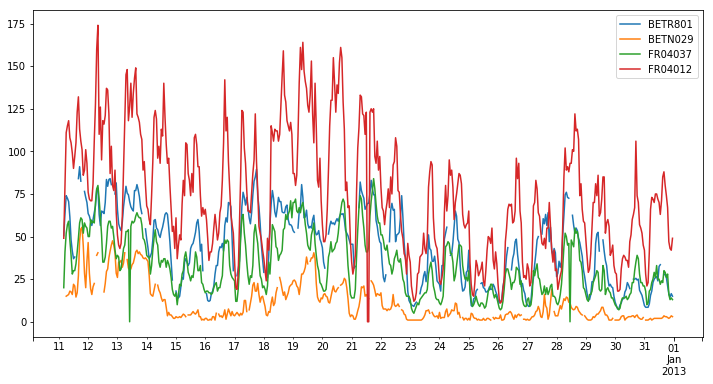

In [29]:
# mozem si povedat, ze chcem len nejaku mensiu cast
no2[-500:].plot(figsize=(12,6))

alebo pouzijem zaujimavejsie operacie s casovymi radmi

In [30]:
no2.index # kedze index su casy, tak viem robit s nimi zaujimave veci

DatetimeIndex(['1990-01-01 00:00:00', '1990-01-01 01:00:00',
               '1990-01-01 02:00:00', '1990-01-01 03:00:00',
               '1990-01-01 04:00:00', '1990-01-01 05:00:00',
               '1990-01-01 06:00:00', '1990-01-01 07:00:00',
               '1990-01-01 08:00:00', '1990-01-01 09:00:00',
               ...
               '2012-12-31 14:00:00', '2012-12-31 15:00:00',
               '2012-12-31 16:00:00', '2012-12-31 17:00:00',
               '2012-12-31 18:00:00', '2012-12-31 19:00:00',
               '2012-12-31 20:00:00', '2012-12-31 21:00:00',
               '2012-12-31 22:00:00', '2012-12-31 23:00:00'],
              dtype='datetime64[ns]', length=198895, freq=None)

In [31]:
no2["2010-01-01 09:00": "2010-01-01 12:00"] # napriklad definovat rozsahy pomocou stringu s datumom

BETR801  BETN029  FR04037  FR04012
2010-01-01 09:00:00     17.0      7.0     19.0     41.0
2010-01-01 10:00:00     18.0      5.0     21.0     48.0
2010-01-01 11:00:00     17.0      4.0     23.0     63.0
2010-01-01 12:00:00     18.0      4.0     22.0     57.0

In [32]:
no2['2012'] # alebo takto vybrat vsetky data z jedneho konkretneho roku
# no2['2012'].head()
# no2['2012/03'] # alebo len data z marca

BETR801  BETN029  FR04037  FR04012
2012-01-01 00:00:00     21.0      1.0     17.0     56.0
2012-01-01 01:00:00     18.0      1.0     16.0     50.0
2012-01-01 02:00:00     20.0      1.0     14.0     46.0
2012-01-01 03:00:00     16.0      1.0     17.0     47.0
2012-01-01 04:00:00     13.0      1.0     18.0     45.0
2012-01-01 05:00:00     17.0      1.0     15.0     36.0
2012-01-01 06:00:00     15.0      1.0     11.0     31.0
2012-01-01 07:00:00     13.0      1.0     12.0     30.0
2012-01-01 08:00:00     15.0      1.0     10.0     28.0
2012-01-01 09:00:00     15.0      1.0     12.0     42.0
2012-01-01 10:00:00     19.0      NaN     14.0     44.0
2012-01-01 11:00:00     28.0      1.0     18.0     54.0
2012-01-01 12:00:00     25.0      4.0     17.0     39.0
2012-01-01 13:00:00     29.5      4.0     15.0     45.0
2012-01-01 14:00:00     31.5      1.0     17.0     54.0
2012-01-01 15:00:00     33.5      1.0     18.0     69.0
2012-01-01 16:00:00     32.5      1.0     19.0     66.0
2012-01-01 17:00:00     30.0      1.0     19.0     69.0
2012-01-01 18:00:00     25.0      2.5     17.0     57.0
2012-01-01 19:00:00     20.0      1.0     15.0     47.0
2012-01-01 20:00:00     14.0      4.0     12.0     43.0
2012-01-01 21:00:00     13.0      1.0     11.0     35.0
2012-01-01 22:00:00     15.0      2.5     10.0     26.0
2012-01-01 23:00:00     14.0      1.0     11.0     39.0
2012-01-02 00:00:00      NaN      1.0     10.0     29.0
2012-01-02 01:00:00      NaN      1.0      9.0     22.0
2012-01-02 02:00:00     10.5      1.0      9.0     15.0
2012-01-02 03:00:00     12.0      1.0      7.0     12.0
2012-01-02 04:00:00     12.0      1.0     11.0     27.0
2012-01-02 05:00:00     39.0      1.0     26.0     44.0
...                      ...      ...      ...      ...
2012-12-30 18:00:00     24.5      4.0     39.0     74.0
2012-12-30 19:00:00     25.0      2.5     37.0     70.0
2012-12-30 20:00:00     18.5      2.0     28.0     57.0
2012-12-30 21:00:00     17.0      1.5     23.0     55.0
2012-12-30 22:00:00     15.5      1.5     23.0     52.0
2012-12-30 23:00:00     12.5      2.5     21.0     45.0
2012-12-31 00:00:00      9.5      NaN     21.0     42.0
2012-12-31 01:00:00      8.5      1.0     18.0     28.0
2012-12-31 02:00:00      8.5      1.0     10.0     21.0
2012-12-31 03:00:00      8.5      1.0     11.0     23.0
2012-12-31 04:00:00     10.5      1.5     18.0     41.0
2012-12-31 05:00:00     15.5      2.0     19.0     66.0
2012-12-31 06:00:00     18.0      1.0     23.0     73.0
2012-12-31 07:00:00     23.0      1.5     25.0     72.0
2012-12-31 08:00:00     25.0      2.0     29.0     70.0
2012-12-31 09:00:00     26.0      2.0     26.0     75.0
2012-12-31 10:00:00     26.5      2.0     33.0     75.0
2012-12-31 11:00:00     24.0      2.0     25.0     72.0
2012-12-31 12:00:00     32.5      2.0     25.0     70.0
2012-12-31 13:00:00     33.5      2.0     22.0     63.0
2012-12-31 14:00:00      NaN      2.0     24.0     71.0
2012-12-31 15:00:00      NaN      2.5     23.0     85.0
2012-12-31 16:00:00     28.0      3.5     30.0     88.0
2012-12-31 17:00:00     27.5      3.0     29.0     80.0
2012-12-31 18:00:00     26.0      3.0     26.0     74.0
2012-12-31 19:00:00     21.0      2.5     28.0     67.0
2012-12-31 20:00:00     16.5      2.0     16.0     47.0
2012-12-31 21:00:00     14.5      2.5     13.0     43.0
2012-12-31 22:00:00     16.5      3.5     14.0     42.0
2012-12-31 23:00:00     15.0      3.0     13.0     49.0

[8784 rows x 4 columns]

In [33]:
# komponenty datumu su pristupne z indexu
# no2.index.hour
no2.index.year

Int64Index([1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990,
            ...
            2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012],
           dtype='int64', length=198895)

In [34]:
# a co je zaujimavejsie, viem zmenit vzorkovaciu frekvenciu
no2.resample('D').mean().head()

BETR801    BETN029  FR04037  FR04012
1990-01-01        NaN  21.500000      NaN      NaN
1990-01-02  53.923077  35.000000      NaN      NaN
1990-01-03  63.000000  29.136364      NaN      NaN
1990-01-04  65.250000  42.681818      NaN      NaN
1990-01-05  63.846154  40.136364      NaN      NaN

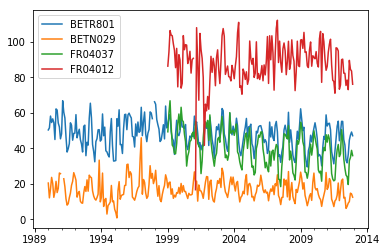

In [35]:
no2.resample('M').mean().plot()
# toto sa zda, ze povie uz trochu viac. Napriklad, ze je tu asi nejaka sezonnost

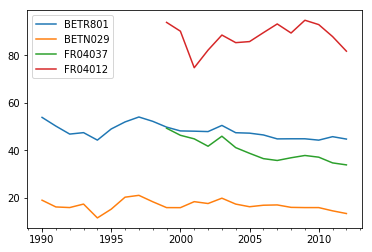

In [36]:
no2.resample('A').mean().plot()
# a mozno aj nejaky dlhodoby trend

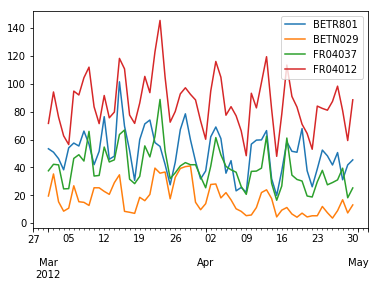

In [37]:
no2['2012-3':'2012-4'].resample('D').mean().plot()
# mozno je tam aj nejaka tyzdenna sezonnost

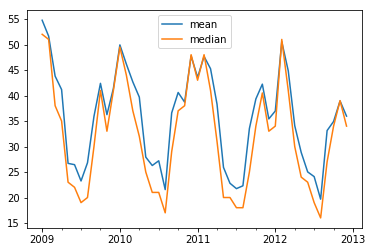

In [38]:
# mozem pouzit aj viacero agregacnych funkcii a porovnat si ich
no2.loc['2009':, 'FR04037'].resample('M').agg(['mean', 'median']).plot()
# no2.loc['2009':, 'FR04037'].resample('M').agg(['mean', 'std']).plot()

## Pozor resample != groupby

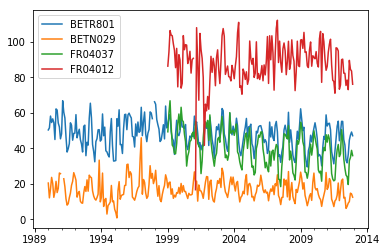

In [39]:
no2.resample('M').mean().plot()

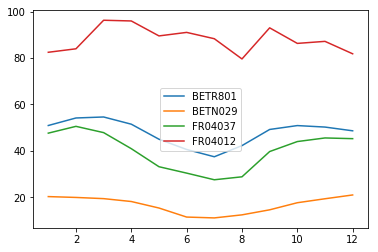

In [40]:
no2.groupby(no2.index.month).mean().plot()

# Zopar uloh na groupby

Otazka: ako by ste vyplotovali typycky denny priebeh hodnoty pre rozne stanice?
<!--
no2.groupby(no2.index.hour).mean().plot()
-->

Otazka: aky je rozdiel v priebehu hodnot medzi typickym dnom v tyzdni a cez vikend pre stanicu FR04012?
<!--
no2['weekday'] = no2.index.weekday
no2['weekend'] = no2['weekday'].isin([5, 6])
data_weekend = no2.groupby(['weekend', no2.index.hour]).mean()
data_weekend_FR04012 = data_weekend['FR04012'].unstack(level=0)
data_weekend_FR04012.plot()
-->

# Priklad analyzy s pouzitim ineho datasetu
tentokrat to nebudu casove rady, ale klasicky dataset na predvadzanie kalsifikacie Iris

In [41]:
iris_data = pd.read_csv('data/iris-data.csv')
iris_data.head()
# toto je trochu spotvoreny dataset kvetiniek

sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm  \
0              5.1             3.5              1.4             0.2   
1              4.9             3.0              1.4             0.2   
2              4.7             3.2              1.3             0.2   
3              4.6             3.1              1.5             0.2   
4              5.0             3.6              1.4             0.2   

         class  
0  Iris-setosa  
1  Iris-setosa  
2  Iris-setosa  
3  Iris-setosa  
4  Iris-setosa

In [42]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length_cm    150 non-null float64
sepal_width_cm     150 non-null float64
petal_length_cm    150 non-null float64
petal_width_cm     145 non-null float64
class              150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [43]:
iris_data.describe()

sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm
count       150.000000      150.000000       150.000000      145.000000
mean          5.644627        3.054667         3.758667        1.236552
std           1.312781        0.433123         1.764420        0.755058
min           0.055000        2.000000         1.000000        0.100000
25%           5.100000        2.800000         1.600000        0.400000
50%           5.700000        3.000000         4.350000        1.300000
75%           6.400000        3.300000         5.100000        1.800000
max           7.900000        4.400000         6.900000        2.500000

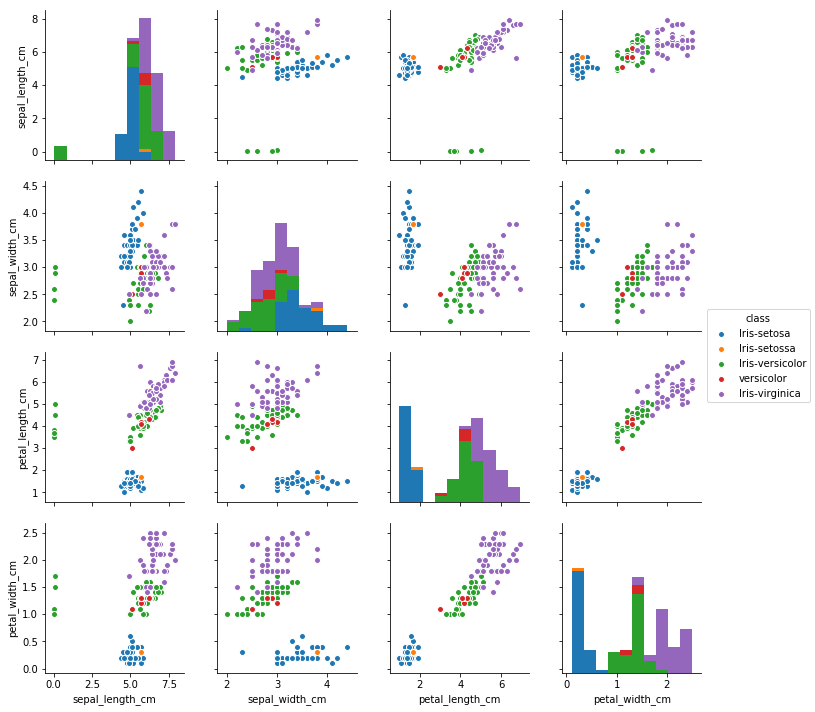

In [44]:
seaborn.pairplot(iris_data.dropna(), hue='class')

In [45]:
iris_data.loc[iris_data['class'] == 'versicolor', 'class'] = 'Iris-versicolor'
iris_data.loc[iris_data['class'] == 'Iris-setossa', 'class'] = 'Iris-setosa'

iris_data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

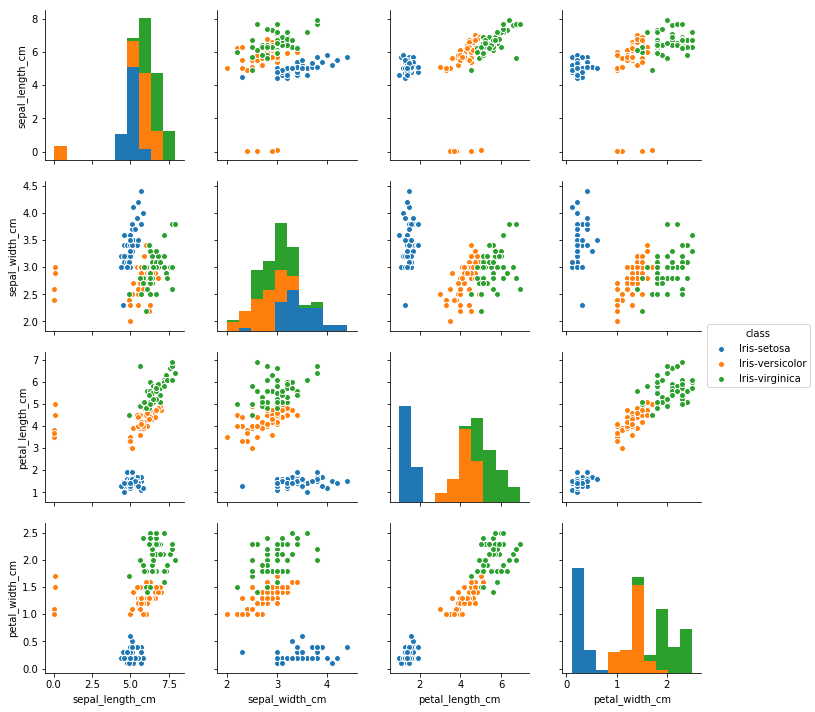

In [46]:
seaborn.pairplot(iris_data.dropna(), hue='class')

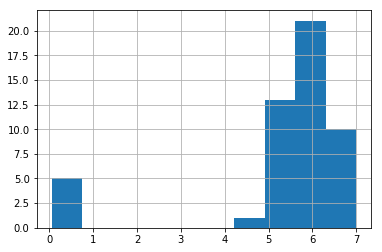

In [47]:
iris_data.loc[iris_data['class'] == 'Iris-versicolor', 'sepal_length_cm'].hist()

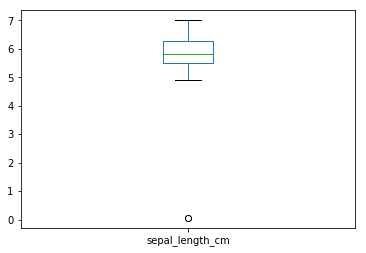

In [48]:
plt.rc("lines", markeredgewidth=0.5)
iris_data.loc[iris_data['class'] == 'Iris-versicolor', 'sepal_length_cm'].plot(kind='box')

In [49]:
iris_data.loc[(iris_data['class'] == 'Iris-versicolor') & (iris_data['sepal_length_cm'] < 1 ), 'sepal_length_cm']

77    0.067
78    0.060
79    0.057
80    0.055
81    0.055
Name: sepal_length_cm, dtype: float64

In [50]:
iris_data.loc[(iris_data['class'] == 'Iris-versicolor') & (iris_data['sepal_length_cm'] > 1 ), 'sepal_length_cm']

50    7.0
51    6.4
52    6.9
53    5.5
54    6.5
55    5.7
56    6.3
57    4.9
58    6.6
59    5.2
60    5.0
61    5.9
62    6.0
63    6.1
64    5.6
65    6.7
66    5.6
67    5.8
68    6.2
69    5.6
70    5.9
71    6.1
72    6.3
73    6.1
74    6.4
75    6.6
76    6.8
82    5.8
83    6.0
84    5.4
85    6.0
86    6.7
87    6.3
88    5.6
89    5.5
90    5.5
91    6.1
92    5.8
93    5.0
94    5.6
95    5.7
96    5.7
97    6.2
98    5.1
99    5.7
Name: sepal_length_cm, dtype: float64

In [51]:
mask = (iris_data['class'] == 'Iris-versicolor') & (iris_data['sepal_length_cm'] < 1 )

iris_data.loc[mask, 'sepal_length_cm'] = iris_data.loc[mask, 'sepal_length_cm'] * 100

In [52]:
iris_data.loc[mask, 'sepal_length_cm']

77    6.7
78    6.0
79    5.7
80    5.5
81    5.5
Name: sepal_length_cm, dtype: float64

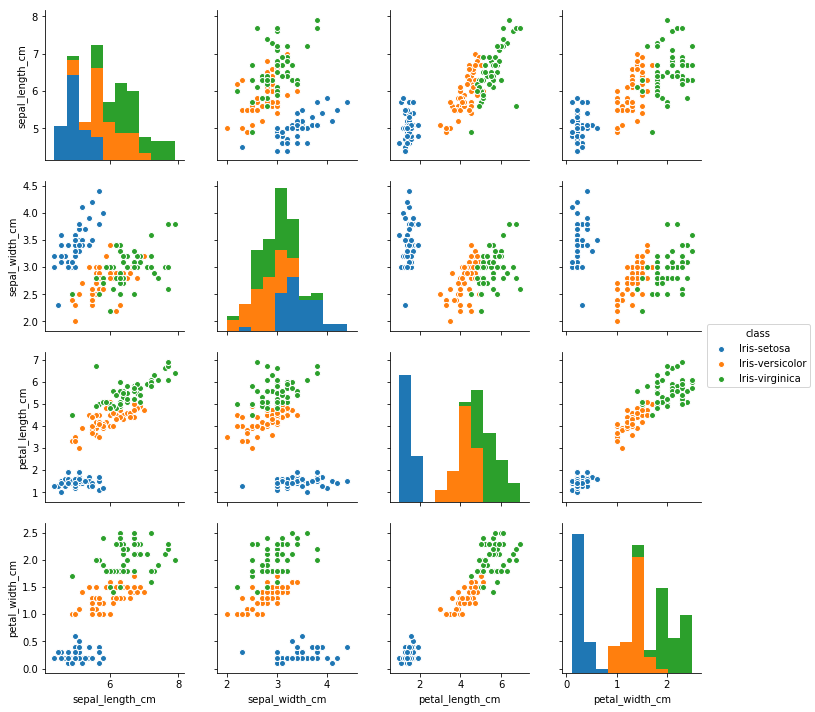

In [53]:
seaborn.pairplot(iris_data.dropna(), hue='class')

## Skusme sa pozriet este na tie chybajuce hodnoty

In [54]:
iris_data.loc[(iris_data['sepal_length_cm'].isnull()) |
              (iris_data['sepal_width_cm'].isnull()) |
              (iris_data['petal_length_cm'].isnull()) |
              (iris_data['petal_width_cm'].isnull())]

sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm  \
7               5.0             3.4              1.5             NaN   
8               4.4             2.9              1.4             NaN   
9               4.9             3.1              1.5             NaN   
10              5.4             3.7              1.5             NaN   
11              4.8             3.4              1.6             NaN   

          class  
7   Iris-setosa  
8   Iris-setosa  
9   Iris-setosa  
10  Iris-setosa  
11  Iris-setosa

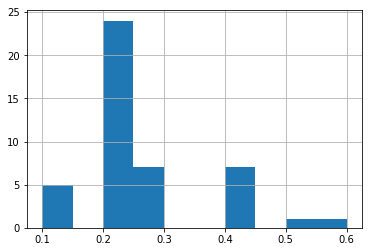

In [55]:
iris_data.loc[iris_data['class'] == 'Iris-setosa', 'petal_width_cm'].hist()

In [56]:
average_petal_width = iris_data.loc[iris_data['class'] == 'Iris-setosa', 'petal_width_cm'].mean()

iris_data.loc[(iris_data['class'] == 'Iris-setosa') &
              (iris_data['petal_width_cm'].isnull()),
              'petal_width_cm'] = average_petal_width

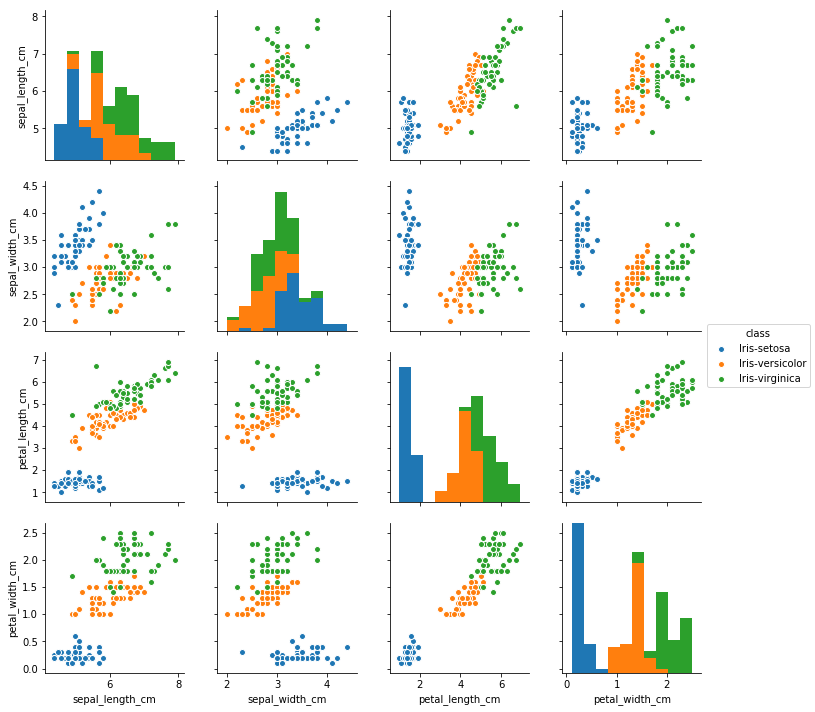

In [57]:
seaborn.pairplot(iris_data, hue='class')

## Iny sposob nahradzania prazdnych hodnot
Pozor, toto je len najjednoduchsia moznost, kde nahradzam chybajucu hodnotu nejakou konstantou. Existuje velmi vela dalsich metod, ktore by ste mali pouzit aj vo svojom projekte.

In [58]:
df = pd.read_csv('https://raw.githubusercontent.com/rasbt/python_reference/master/Data/some_soccer_data.csv')
df.head()

PLAYER  SALARY    GP   G    A  SOT  \
0      Sergio Agüero\n Forward — Manchester City  $19.2m  16.0  14  3.0   34   
1               Eden Hazard\n Midfield — Chelsea  $18.9m  21.0   8  4.0   17   
2             Alexis Sánchez\n Forward — Arsenal  $17.6m   NaN  12  7.0   29   
3        Yaya Touré\n Midfield — Manchester City  $16.6m  18.0   7  1.0   19   
4  Ángel Di María\n Midfield — Manchester United  $15.0m  13.0   3  NaN   13   

     PPG       P  
0  13.12  209.98  
1  13.05  274.04  
2  11.19  223.86  
3  10.99  197.91  
4  10.17  132.23

In [59]:
# predtym sme to robili manulane. 
# iris_data.loc[(iris_data['class'] == 'Iris-setosa') & (iris_data['petal_width_cm'].isnull()), 'petal_width_cm'] = average_petal_width

# Da sa na to pouzit takato pekna funkcia
df.fillna(value=0, inplace=True)
df

PLAYER  SALARY    GP   G     A  SOT  \
0      Sergio Agüero\n Forward — Manchester City  $19.2m  16.0  14   3.0   34   
1               Eden Hazard\n Midfield — Chelsea  $18.9m  21.0   8   4.0   17   
2             Alexis Sánchez\n Forward — Arsenal  $17.6m   0.0  12   7.0   29   
3        Yaya Touré\n Midfield — Manchester City  $16.6m  18.0   7   1.0   19   
4  Ángel Di María\n Midfield — Manchester United  $15.0m  13.0   3   0.0   13   
5          Santiago Cazorla\n Midfield — Arsenal  $14.8m  20.0   4   0.0   20   
6       David Silva\n Midfield — Manchester City  $14.3m  15.0   6   2.0   11   
7             Cesc Fàbregas\n Midfield — Chelsea  $14.0m  20.0   2  14.0   10   
8           Saido Berahino\n Forward — West Brom  $13.8m  21.0   9   0.0   20   
9          Steven Gerrard\n Midfield — Liverpool  $13.8m  20.0   5   1.0   11   

     PPG       P  
0  13.12  209.98  
1  13.05  274.04  
2  11.19  223.86  
3  10.99  197.91  
4  10.17  132.23  
5   9.97    0.00  
6  10.35  155.26  
7  10.47  209.49  
8   7.02  147.43  
9   7.50  150.01

## Existuje vsak este elegantnejsi sposob

In [60]:
df = pd.read_csv('https://raw.githubusercontent.com/rasbt/python_reference/master/Data/some_soccer_data.csv')
df = df.rename(columns={'P': 'points', 
                        'GP': 'games',
                        'SOT': 'shots_on_target',
                        'G': 'goals',
                        'PPG': 'points_per_game',
                        'A': 'assists',})
df['SALARY'] = df['SALARY'].apply(lambda x: x.strip('$m'))

def process_player_col(text):
    name, rest = text.split('\n')
    position, team = [x.strip() for x in rest.split(' — ')]
    return pd.Series([name, team, position])

df[['PLAYER', 'team', 'position']] = df.PLAYER.apply(process_player_col)            
               
df.head()

PLAYER SALARY  games  goals  assists  shots_on_target  \
0   Sergio Agüero   19.2   16.0     14      3.0               34   
1     Eden Hazard   18.9   21.0      8      4.0               17   
2  Alexis Sánchez   17.6    NaN     12      7.0               29   
3      Yaya Touré   16.6   18.0      7      1.0               19   
4  Ángel Di María   15.0   13.0      3      NaN               13   

   points_per_game  points               team  position  
0            13.12  209.98    Manchester City   Forward  
1            13.05  274.04            Chelsea  Midfield  
2            11.19  223.86            Arsenal   Forward  
3            10.99  197.91    Manchester City  Midfield  
4            10.17  132.23  Manchester United  Midfield

In [ ]:
# v kniznici sklearn uz su predpripravene nejake metody na nahradzanie chybajucich hodnot
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
df[['games', 'assists']] = imp.fit_transform(df[['games', 'assists']].values)
df.head()

Pozor, toto doplnanie neberie do uvahy triedu

In [ ]:
df.games.mean()

In [ ]:
df[df.position == 'Forward'].games.mean()

Cize mozno by bolo lepsie spravit trochu inteligentnejsie nahradzanie chybajucich hodnot, ktore pocita oddelene priemery pre rozne skupiny hracov. Toto sa vola nahradenie chýbajúcej hodnoty priemerom segmentu (je to jedna z moznosti, ktoru by ste mali vyskusat v druhej casti projektu).

# Sumar, co si zobrat z tejto explorativnej analyzy

* Uisite sa, ze data su kodovane spravne (najcastejsie sa treba pozriet manualne do dat)
* Uistite sa, ze data spadaju do ocakavaneho rozsahu a vsetky maju ocakavany tvar (napriklad format casu)
* Porieste chybajuce data napriklad vyhodenim, nahradenim priemerom (priemer moze byt s ohladom na triedu), ...
* Nikdy nesahajte do dat manualne. Vzdy pouzivajte kod, ktory si odlozite a pouzijete vzdy, ked budete opakovat experiment. Chceme, aby bola analyza reprodukovatelna
* Spravte si grafy vsetkeho, co sa len da, aby ste si vizualne potvrdili, ze nieco je tak, ako by malo byt

# Nejake dalsie dobre zdroje, ktore by ste si mali prejst na precvicenie

### Priklad analyzy datasetu cestujucich Titanicu
https://www.kaggle.com/startupsci/titanic-data-science-solutions

### Kurz na cistenie dat
https://github.com/datacamp/courses-tidy-data-in-python